In [1]:
import pandas as pd
# URL of the CSV file
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/Resistencia/data/230622_AMR_mysterious_ETBC_all_nelly.csv'  # Replace with the actual GitHub URL of the CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Print the DataFrame
print(df)

# Getting consensus by city

# Function to calculate mode and concatenate "Species" and "City"
def calculate_mode_and_concatenate(group):
    mode_values = group.mode().iloc[0]
    group['ID'] = f"{group['Species'].iloc[0]}_{group['City'].iloc[0]}"
    return mode_values

# Group by "Species" and "City" columns, apply mode to each other column, and add "ID" column
df_grouped = df.groupby(["Species", "City"]).apply(calculate_mode_and_concatenate)

# Reset index to remove the grouped columns from the index
df_grouped.reset_index(drop=True, inplace=True)

# Print the resulting grouped DataFrame
print(df_grouped)

# Export the DataFrame as a CSV file
csv_file_path = 'Representants.csv'
df_grouped.to_csv(csv_file_path, index=False)
import pandas as pd

# Assuming your DataFrame is named 'df'

# Print the updated DataFrame
print(df)

# Print the file paths
print("CSV file saved:", csv_file_path)



         ID                  Species        City AST-based group  ARO:3000167  \
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant          0.0   
1        S2  Enterobacter hormaechei  mysterious          CP CRE          0.0   
2        S3  Enterobacter hormaechei  mysterious          CP CRE          0.0   
3        S4  Enterobacter hormaechei  mysterious          CP CRE          0.0   
4        S5  Enterobacter hormaechei  mysterious          CP CRE          0.0   
..      ...                      ...         ...             ...          ...   
151  NYC_Kl    Klebsiella pneumoniae         NYC               0          0.0   
152  SAC_En  Enterobacter hormaechei         SAC               0          0.0   
153  DEN_Es         Escherichia coli         DEN               0          0.0   
154  DEN_Kl    Klebsiella pneumoniae         DEN               0          0.0   
155  SAN_En  Enterobacter hormaechei         SAN               0          0.0   

     ARO:3002847  mrkb  ent

In [2]:
# Replace values in the 'ID' column
df_grouped['ID'] = df_grouped['ID'].replace({'S1': 'En_mysterious', 'S10': 'Es_mysterious','S100': 'Kl_mysterious'})

print(df_grouped)

0              ID                  Species        City AST-based group  \
0          BAL_En  Enterobacter hormaechei         BAL               0   
1          DEN_En  Enterobacter hormaechei         DEN               0   
2          MIN_En  Enterobacter hormaechei         MIN               0   
3          NYC_En  Enterobacter hormaechei         NYC               0   
4          SAC_En  Enterobacter hormaechei         SAC               0   
5          SAN_En  Enterobacter hormaechei         SAN               0   
6   En_mysterious  Enterobacter hormaechei  mysterious          CP CRE   
7          DEN_Es         Escherichia coli         DEN               0   
8          NYC_Es         Escherichia coli         NYC               0   
9   Es_mysterious         Escherichia coli  mysterious          CP CRE   
10         DEN_Kl    Klebsiella pneumoniae         DEN               0   
11         NYC_Kl    Klebsiella pneumoniae         NYC               0   
12  Kl_mysterious    Klebsiella pneumo

In [3]:
from scipy.spatial.distance import pdist, squareform

# Assuming your DataFrame is named 'df_grouped'

# Select the columns of interest
columns_of_interest = df_grouped.columns[4:508]

# Calculate the pairwise distances
dist_matrix = pdist(df_grouped[columns_of_interest].values, metric='euclidean')

# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

# Create a DataFrame from the distance matrix
df_dist_matrix = pd.DataFrame(dist_matrix_square, index=df_grouped.index, columns=df_grouped.index)

# Print the distance matrix DataFrame
print(df_dist_matrix)




           0          1          2          3          4          5   \
0    0.000000   6.708204   7.000000  11.661904   7.348469   6.928203   
1    6.708204   0.000000   3.464102  13.152946   4.795832   3.316625   
2    7.000000   3.464102   0.000000  13.527749   3.605551   1.000000   
3   11.661904  13.152946  13.527749   0.000000  13.114877  13.564660   
4    7.348469   4.795832   3.605551  13.114877   0.000000   3.464102   
5    6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
6    8.660254   8.246211   8.124038  11.445523   8.185353   8.185353   
7    6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
8    8.426150   7.211103   6.782330  12.529964   6.855655   6.708204   
9   12.845233  12.569805  12.649111  13.674794  12.688578  12.688578   
10   6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
11  11.575837  12.845233  13.228757   8.831761  12.806248  13.190906   
12  11.747340  11.180340  11.000000  12.569805  10.770330  10.95

<ipython-input-4-4d3cdce4cfe1>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(df_dist_matrix.values, method='ward')


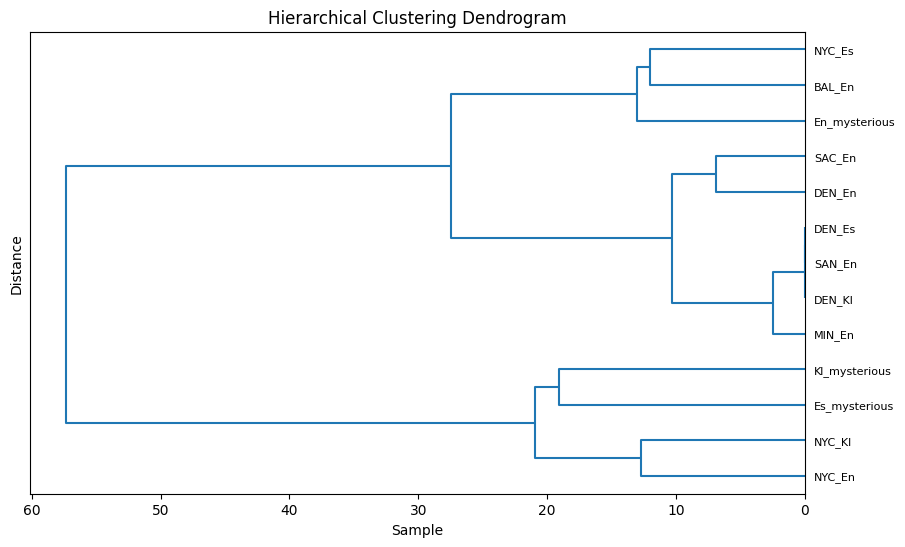

In [4]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming your distance matrix DataFrame is named 'df_dist_matrix'

# Calculate the linkage matrix
linkage_matrix = linkage(df_dist_matrix.values, method='ward')
labels = df_grouped['ID'].values

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=labels, color_threshold=0, orientation='left', leaf_font_size=8)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Show the plot
plt.show()


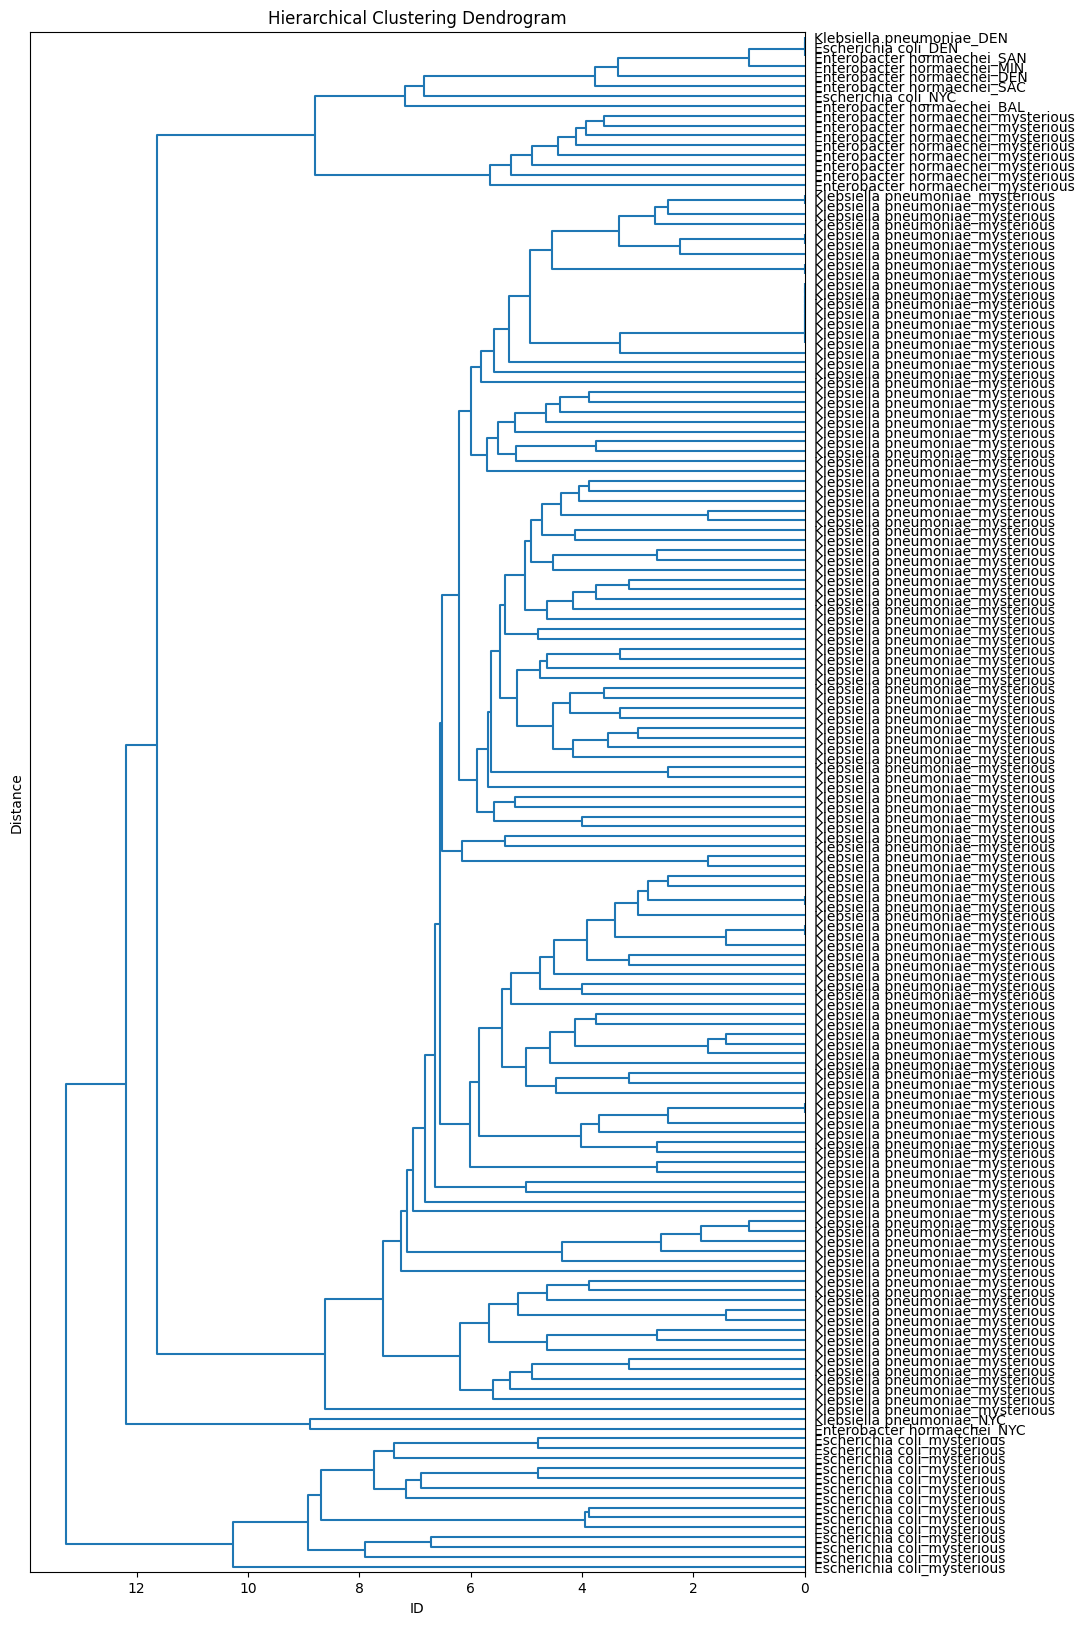

In [10]:

import pandas as pd
import requests
from io import StringIO
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the URL
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/Resistencia/data/230622_AMR_mysterious_ETBC_all_nelly.csv'

# Make a GET request to fetch the data from the URL
response = requests.get(url)

# Read the response content into a DataFrame
df = pd.read_csv(StringIO(response.text))


# Extract the columns for clustering and labeling
data = df.iloc[:, 5:].values
labels = df['Species'].values+"_"+df['City'].values

# Perform hierarchical clustering
Z = linkage(data, method='average')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 20))
dendrogram(Z, labels=labels, color_threshold=0, leaf_font_size=10,orientation='left', ax=ax)

# Set plot title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ID')
plt.ylabel('Distance')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import requests
from io import StringIO
from sklearn.cluster import KMeans

# Define the URL
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/Resistencia/data/230622_AMR_mysterious_ETBC_all_nelly.csv'

# Make a GET request to fetch the data from the URL
response = requests.get(url)

# Read the response content into a DataFrame
df = pd.read_csv(StringIO(response.text))

# Extract the columns for clustering
data = df.iloc[:, 5:].values

# Perform clustering
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters
clusters = kmeans.fit_predict(data)

# Add the clusters as a new column in the DataFrame
df['Cluster'] = clusters

# Print the DataFrame with the cluster assignment
print(df)


         ID                  Species        City AST-based group  rpos  \
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant     0   
1        S2  Enterobacter hormaechei  mysterious          CP CRE     0   
2        S3  Enterobacter hormaechei  mysterious          CP CRE     0   
3        S4  Enterobacter hormaechei  mysterious          CP CRE     0   
4        S5  Enterobacter hormaechei  mysterious          CP CRE     0   
..      ...                      ...         ...             ...   ...   
151  NYC_Kl    Klebsiella pneumoniae         NYC               0     1   
152  SAC_En  Enterobacter hormaechei         SAC               0     0   
153  DEN_Es         Escherichia coli         DEN               0     0   
154  DEN_Kl    Klebsiella pneumoniae         DEN               0     0   
155  SAN_En  Enterobacter hormaechei         SAN               0     0   

     ARO:3000361  espy1  drad  allr  feob  ...  ARO:3002132  ARO:3003577  \
0            0.0      0     0     0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
